In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the preprocessed data
df = pd.read_csv('data/preprocessed_combined_dataset.csv')

# Display the first few rows to confirm
print(df.head())
print(df.info())


C:\Users\linke\AppData\Local\Temp\ipykernel_17172\2186092855.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/preprocessed_combined_dataset.csv')


    order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  2020-01-10  received   574772   oasis_Oasis-064-36          4.5   
1  100354678  2020-01-10  received   574774      Fantastic_FT-48          4.5   
2  100354680  2020-01-10  complete   574777      mdeal_DMC-610-8          4.5   
3  100354680  2020-01-10  complete   574779   oasis_Oasis-061-36          4.5   
4  100367357         NaN  received   595185  MEFNAR59C38B6CA08CD          2.0   

   price_x   value  discount_amount   total  ... productURL stars reviews  \
0     89.9  1798.0              0.0  1798.0  ...        NaN   NaN     NaN   
1     19.0   190.0              0.0   190.0  ...        NaN   NaN     NaN   
2    149.9  1199.2              0.0  1199.2  ...        NaN   NaN     NaN   
3     79.9   639.2              0.0   639.2  ...        NaN   NaN     NaN   
4     99.9    99.9              0.0    99.9  ...        NaN   NaN     NaN   

   price_y  listPrice category_id  isBestSeller bo

In [7]:
# Select features for clustering (adjust column names if necessary)
clustering_features = df[['price_x', 'qty_ordered', 'discount_amount']]


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Convert scaled data back into a DataFrame for easier handling
clustering_df = pd.DataFrame(clustering_features_scaled, columns=clustering_features.columns)


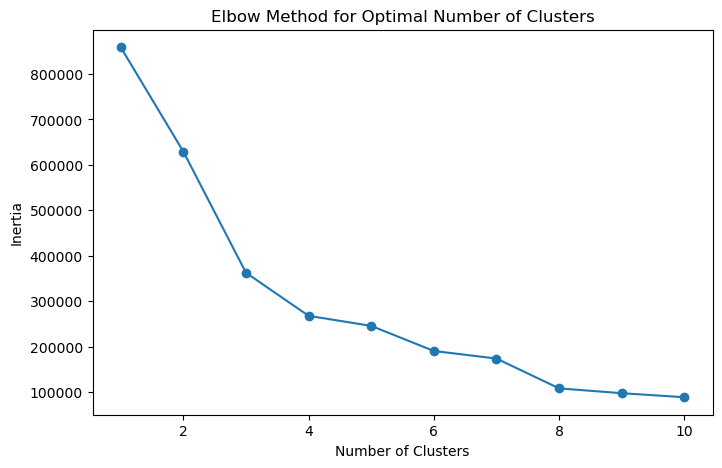

In [11]:
inertias = []
K = range(1, 11)  # Testing from 1 to 10 clusters

# Calculate inertia for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_df)
    inertias.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [13]:
# Initialize the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data and create cluster labels
df['Cluster'] = kmeans.fit_predict(clustering_df)

# Display the first few rows to see the assigned cluster labels
print(df[['price_x', 'qty_ordered', 'discount_amount', 'Cluster']].head())


   price_x  qty_ordered  discount_amount  Cluster
0     89.9          4.5              0.0        0
1     19.0          4.5              0.0        0
2    149.9          4.5              0.0        0
3     79.9          4.5              0.0        0
4     99.9          2.0              0.0        2


C:\Users\linke\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


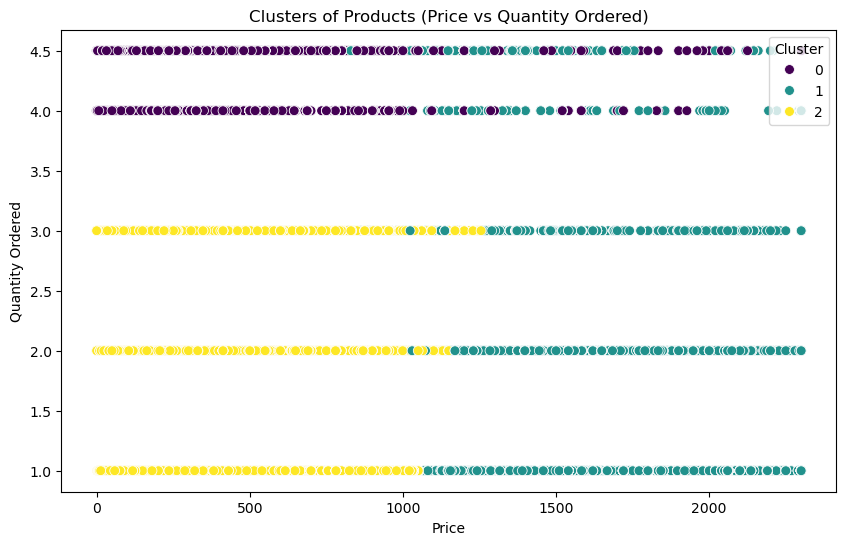

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price_x'], y=df['qty_ordered'], hue=df['Cluster'], palette='viridis', s=50)
plt.title('Clusters of Products (Price vs Quantity Ordered)')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.legend(title='Cluster')
plt.show()
